In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.ticker as ticker
#from scipy import stats
import plotly.graph_objects as go
sns.set_context('paper', font_scale=1.4)

In [80]:
df = pd.read_csv('data.csv')

continents = ['Africa', 'America', 'Asia', 'Oceania', 'Europe']

df = df.rename({"dateRep": "date","continentExp": "continent","countriesAndTerritories": "country", "popData2018":"population"}, axis=1)

df = df.drop(columns=['geoId', 'countryterritoryCode', 'day', 'month', 'year'])

df = df[df.country != 'Cases_on_an_international_conveyance_Japan']

df["date"] = pd.to_datetime(df['date'], format='%d/%m/%Y')

print(df['date'].min(),df['date'].max())

2019-12-31 00:00:00 2020-05-26 00:00:00


In [67]:
df.dtypes

date          datetime64[ns]
cases                  int64
deaths                 int64
country               object
population           float64
continent             object
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 0 to 19456
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        19393 non-null  datetime64[ns]
 1   cases       19393 non-null  int64         
 2   deaths      19393 non-null  int64         
 3   country     19393 non-null  object        
 4   population  19127 non-null  float64       
 5   continent   19393 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.0+ MB


In [69]:
df.columns

Index(['date', 'cases', 'deaths', 'country', 'population', 'continent'], dtype='object')

In [70]:
df.describe()

,cases,deaths,population
count,19393.000000,19393.000000,1.912700e+04
mean,281.484556,17.840819,5.055983e+07
std,1724.126182,124.746206,1.737046e+08
min,-2461.000000,-1918.000000,1.000000e+03
25%,0.000000,0.000000,2.254126e+06
50%,2.000000,0.000000,9.630959e+06
75%,44.000000,1.000000,3.369995e+07
max,48529.000000,4928.000000,1.392730e+09


In [71]:
#Set colors for graphs

sns.set_palette('husl')

In [72]:
#Group cases by Continent and get totals

plt.figure(figsize=(8,8))

tot_cases = []

africa_cases = df.groupby('continent')['cases'].sum()['Africa']
america_cases = df.groupby('continent')['cases'].sum()['America']
asia_cases = df.groupby('continent')['cases'].sum()['Asia']
europe_cases = df.groupby('continent')['cases'].sum()['Europe']
oceania_cases = df.groupby('continent')['cases'].sum()['Oceania']

tot_cases.extend([africa_cases, america_cases, asia_cases, oceania_cases, europe_cases])

explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(tot_cases, labels =continents, explode=explode,
        shadow= True, startangle=90, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5), wedgeprops={'edgecolor': 'black'})



plt.title("Covid-19 Cases Distribution by Continent", y=1.3)
plt.tight_layout()
#plt.savefig('continent_pie.png', dpi=300)
plt.show()


SyntaxError: invalid syntax (<ipython-input-72-516b2805ca74>, line 18)

Text(0.5, 0.98, 'Continent Cases per Day')

<Figure size 432x288 with 0 Axes>

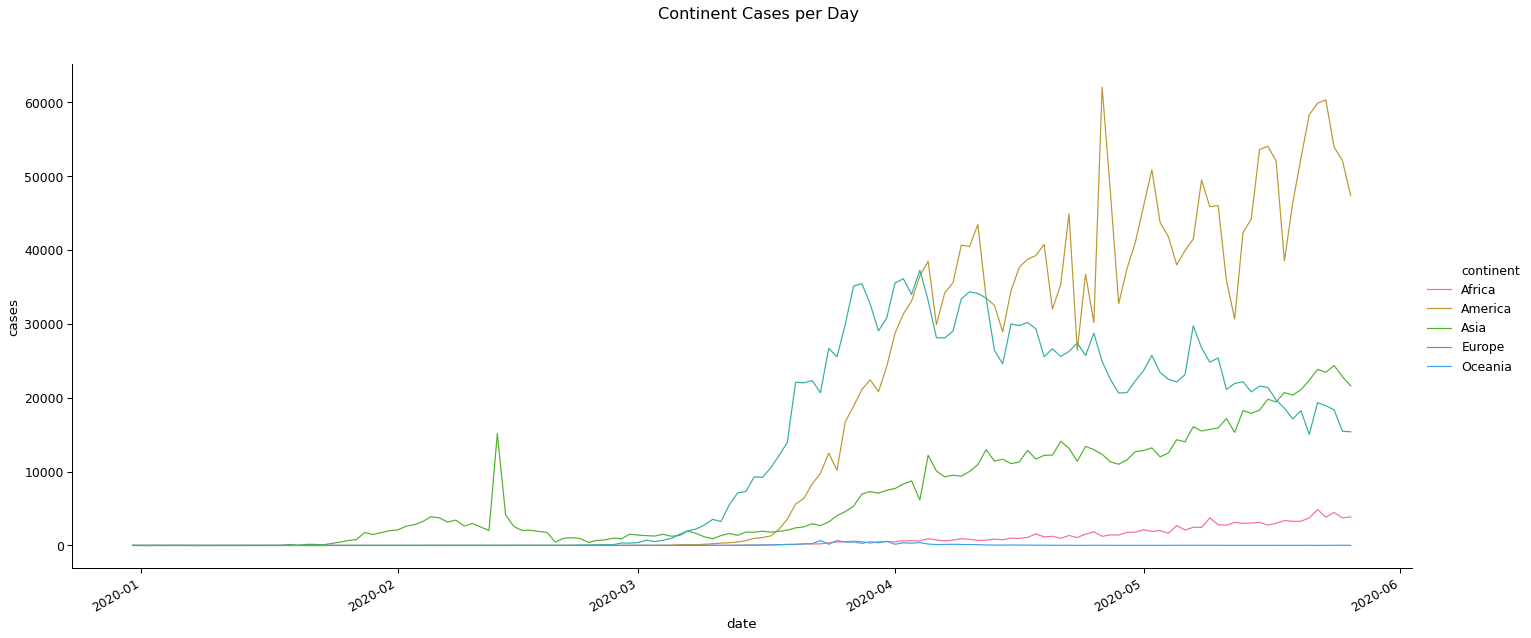

In [73]:
df_cases = df.groupby(['date', 'continent'])[['cases', 'deaths']].sum().reset_index()
#print(df_cases)
# Show continent cases per day

plt.tight_layout()
g = sns.relplot(x='date', y='cases', hue='continent', kind='line', height=10, aspect=2, data=df_cases)
g.fig.autofmt_xdate()

# Set Title, distance from top
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Continent Cases per Day')

#plt.savefig('continent_lines.png', dpi=300)

Text(0.5, 0.98, 'Relationship Between Cases and Deaths')

<Figure size 432x288 with 0 Axes>

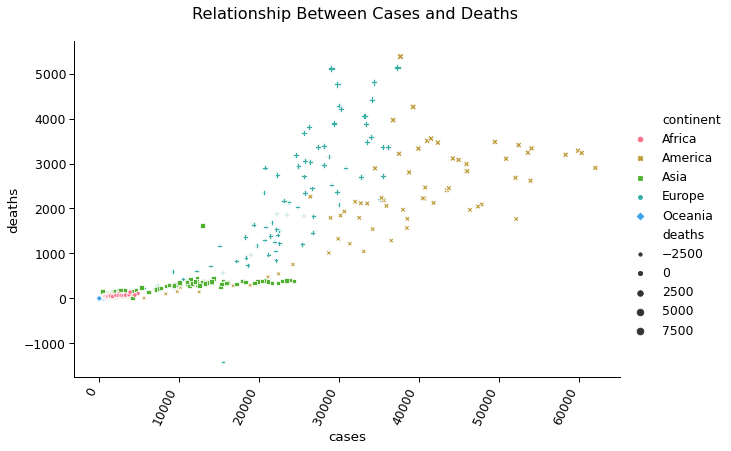

In [74]:
# Plot the Relationship Between Cases and Deaths

#plt.title('Relationship Between Cases and Deaths')

plt.tight_layout()
gg = sns.relplot(x='cases', y='deaths', hue='continent', size='deaths', style='continent', height=6, aspect=1.5, data=df_cases)

# Rotate x ticks
gg.set_xticklabels(rotation=65, horizontalalignment='right')

# Set Title, distance from top
plt.subplots_adjust(top=0.9)
gg.fig.suptitle('Relationship Between Cases and Deaths')

#plt.savefig('rel_cases.png', dpi=300)

In [75]:
# Acumulate cases/deaths by country 
continents = df["continent"].unique()

df_cumulative = pd.DataFrame()
for continent in continents:
    country = df[df['continent'] == continent]['country'].unique()
    for country in country:
        df_country = df[df['country'] == country].sort_values(by='date')[['country', 'continent', 'date', 'cases', 'deaths']]
        df_country['cum_cases'] = df_country['cases'].cumsum()
        df_country['cum_deaths'] = df_country['deaths'].cumsum()
        df_cumulative = pd.concat([df_cumulative, df_country], axis = 0)
    
df_cumulative.head(100)

,country,continent,date,cases,deaths,cum_cases,cum_deaths
19390,Afghanistan,Asia,2019-12-31,0,0,0,0
19323,Afghanistan,Asia,2020-01-01,0,0,0,0
19256,Afghanistan,Asia,2020-01-02,0,0,0,0
19189,Afghanistan,Asia,2020-01-03,0,0,0,0
19122,Afghanistan,Asia,2020-01-04,0,0,0,0
...,...,...,...,...,...,...,...
8703,Afghanistan,Asia,2020-04-14,58,3,665,21
8498,Afghanistan,Asia,2020-04-15,49,2,714,23
8293,Afghanistan,Asia,2020-04-16,70,2,784,25
8088,Afghanistan,Asia,2020-04-17,10,4,794,29


In [76]:
#General Values

df_total_cumulative = df_cumulative.groupby('date').sum()
df_total_cumulative.tail()

,cases,deaths,cum_cases,cum_deaths
date,,,,
2020-05-22,107909,5442,5068670,333392
2020-05-23,106559,4690,5175229,338082
2020-05-24,101131,3989,5276360,342071
2020-05-25,94231,816,5370591,342887
2020-05-26,88239,3100,5223430,319153


In [77]:
df_cum_continent = pd.DataFrame()
for continent in continents:
    df_continent = df_cumulative[df_cumulative['continent'] == continent]
    df_continent = df_continent.sort_values(by='date')
    df_continent['cum_cases'] = df_continent['cases'].cumsum()
    df_continent['cum_deaths'] = df_continent['deaths'].cumsum()
    df_cum_continent = pd.concat([df_cum_continent, df_continent], axis=0)
    
df_cum_continent.tail(10)

,country,continent,date,cases,deaths,cum_cases,cum_deaths
22,Australia,Oceania,2020-05-25,3,0,8584,130
345,New_Caledonia,Oceania,2020-05-25,0,0,8584,130
92,French_Polynesia,Oceania,2020-05-26,0,0,8584,130
83,Fiji,Oceania,2020-05-26,0,0,8584,130
161,New_Caledonia,Oceania,2020-05-26,0,0,8584,130
101,Guam,Oceania,2020-05-26,0,0,8584,130
162,New_Zealand,Oceania,2020-05-26,0,0,8584,130
156,Northern_Mariana_Islands,Oceania,2020-05-26,0,0,8584,130
21,Australia,Oceania,2020-05-26,9,0,8593,130
171,Papua_New_Guinea,Oceania,2020-05-26,0,0,8593,130


In [78]:
df_cum_continent[df_cum_continent['continent'] == "Asia"].tail()

,country,continent,date,cases,deaths,cum_cases,cum_deaths
114,Iraq,Asia,2020-05-26,163,3,970564,27647
169,Palestine,Asia,2020-05-26,0,0,970564,27647
168,Pakistan,Asia,2020-05-26,1356,30,971920,27677
118,Jordan,Asia,2020-05-26,3,0,971923,27677
220,Yemen,Asia,2020-05-26,15,3,971938,27680


In [79]:
#Total cases for each continent
df_asia = df_cum_continent[df_cum_continent["continent"] == "Asia"].groupby("date").max()
df_africa = df_cum_continent[df_cum_continent["continent"] == "Africa"].groupby("date").max()
df_europe = df_cum_continent[df_cum_continent["continent"] == "Europe"].groupby("date").max()
df_americas = df_cum_continent[df_cum_continent["continent"] == "Americas"].groupby("date").max()
df_oceania = df_cum_continent[df_cum_continent["continent"] == "Oceania"].groupby("date").max()